Q. why normalization is used when data is not normally distributed

# What is Feature Scaling?
- Feature Scalling is a technique of bringing down the values of all the independent faetures of our dataset on the same scale
- It helps to do calculations in distance based algorithms very quickly and reduce complexity of the model.
- Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step. 
- Just to give you an example — if you have multiple independent variables like age, salary, and height; With their range as (18–100 Years), (25,000–75,000 Euros), and (1–2 Meters) respectively, feature scaling would help them all to be in the same range, for example- centered around 0 or in the range (0,1) depending on the scaling technique.

- If we didn't do feature scalling then the distance based machine learning algorithms gives higher weightage to the features having higher magnitude values and lower weightage to the lower magnitude values.


- In order to visualize the above, let us take an example of the independent variables of alcohol and Malic Acid content in the wine dataset from the “Wine Dataset” that is deposited on the UCI machine learning repository. Below you can see the impact of the two most common scaling techniques (Normalization and Standardization) on the dataset.

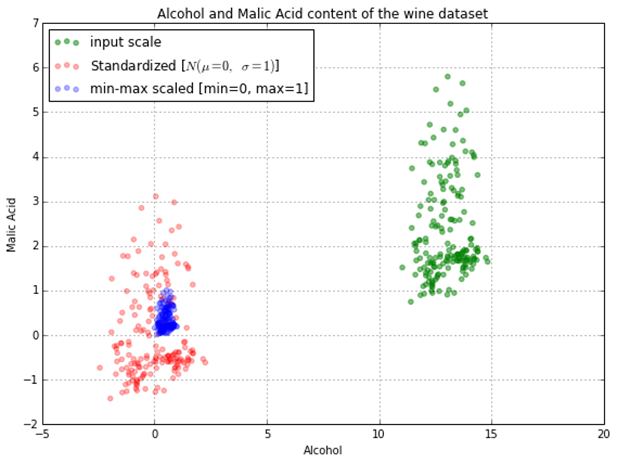
                           The impact of Standardization and Normalisation on the Wine dataset

# Methods for Scaling
- Now, since you have an idea of what is feature scaling. Let us explore what methods are available for doing feature scaling. Of all the methods available, the most common ones are:

1. Normalization / Min_Max Scalar
2. Standardization
3. Max Abs Scaler
4. Robust Scaler
5. Quantile Transformer Scaler
6. Power Transformer Scaler
7. Unit Vector Scaler

### 1. Normalization

- Also known as min-max scaling or min-max normalization
- It is the simplest method and consists of rescaling the range of features to scale the range in [0, 1]. 
- The general formula for normalization is given as:

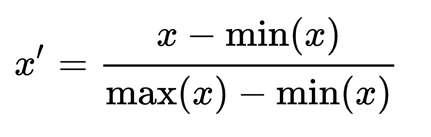

- Here, max(x) and min(x) are the maximum and the minimum values of the feature respectively.
- Normalization is good to use when the distribution of data does not follow a Gaussian distribution i.e data is not normally distributed. It can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors.
- It's impacted by outliers

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
df_1 = pd.DataFrame({'WEIGHT': [15, 18, 12,10],
                   'PRICE': [1,3,2,5]},
                   index = ['Orange','Apple','Banana','Grape'])
print(df_1)

        WEIGHT  PRICE
Orange      15      1
Apple       18      3
Banana      12      2
Grape       10      5


In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler_1 = MinMaxScaler(feature_range=(0, 1))

In [27]:
scaled_data = scaler_1.fit_transform(df_1)
scaled_data

array([[0.625, 0.   ],
       [1.   , 0.5  ],
       [0.25 , 0.25 ],
       [0.   , 1.   ]])

In [7]:
result = pd.DataFrame(scaled_data,
                      columns=df.columns,
                      index = ['Orange','Apple','Banana','Grape'] )
result

,WEIGHT,PRICE
Orange,0.625,0.00
Apple,1.000,0.50
Banana,0.250,0.25
Grape,0.000,1.00


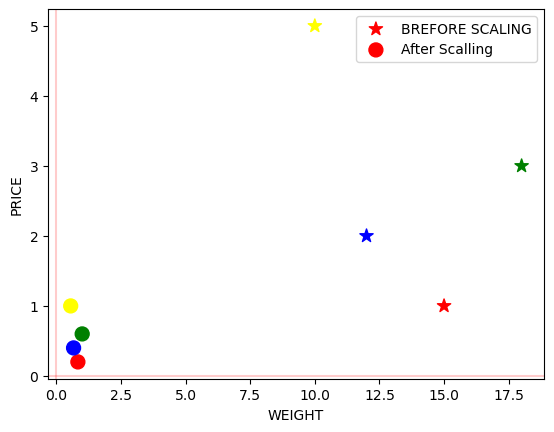

In [41]:
ax = df_1.plot.scatter(x='WEIGHT', y='PRICE',
                     color=['red','green','blue','yellow'], 
                     marker = '*',
                     s=100, 
                     label='BREFORE SCALING'); 
result.plot.scatter(x='WEIGHT', y='PRICE',
                   color=['red','green','blue','yellow'],
                   marker = "o",
                   s = 100,
                   label = "After Scalling",ax = ax);
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)

#### Normalization is also known as min-max scaling or min-max normalization
- We can also do a normalization over different intervals, e.g. choosing to have the variable laying in any [a, b] interval, a and b being real numbers. 
- To rescale a range between an arbitrary set of values [a, b], the formula becomes:

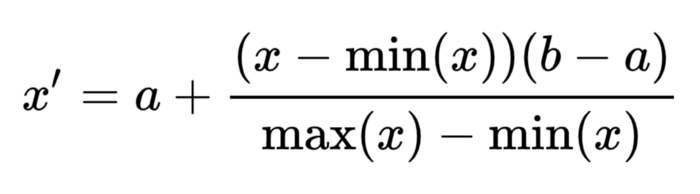

In [12]:
df_2 = pd.DataFrame({'WEIGHT': [15, 18, 12,10],
                   'PRICE': [1,3,2,5]},
                   index = ['Orange','Apple','Banana','Grape'])
print(df_2)

        WEIGHT  PRICE
Orange      15      1
Apple       18      3
Banana      12      2
Grape       10      5


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler_2 = MinMaxScaler(feature_range=(0, 10))

In [16]:
scaled_data = scaler_2.fit_transform(df_2)
scaled_data

array([[ 6.25,  0.  ],
       [10.  ,  5.  ],
       [ 2.5 ,  2.5 ],
       [ 0.  , 10.  ]])

In [17]:
result = pd.DataFrame(scaled_data, columns=df_2.columns,index = ['Orange','Apple','Banana','Grape'] )
result

,WEIGHT,PRICE
Orange,6.25,0.0
Apple,10.00,5.0
Banana,2.50,2.5
Grape,0.00,10.0


### 2. Standardization

- The Standard Scaler assumes data is normally distributed within each feature and scales them such that the distribution centered around 0 i.e zero mean and with a standard deviation of 1 i.e unit variance.
- Standardization is also known as z-score normalization
- In standardization values in column are rescaled so that they demonstrate the properties of standard Gaussian Distribution / Normal Distribution that is mean = 0 and variance = 1.
- mean = 0
- standard deviation = 1
- use the standard deviation if data is normally distributed
- Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. If data is not normally distributed, this is not the best Scaler to use.
- It's not impacted by outliers doesnot remove outliers
- The general method of calculation is to determine the distribution mean and standard deviation for each feature and calculate the new data point by the following formula:

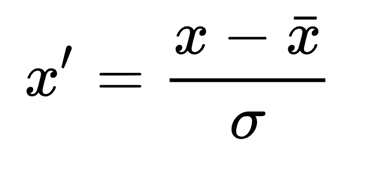

- Here, σ is the standard deviation of the feature vector, and x̄ is the average of the feature vector.

###### standard deviation
- Standard deviation is a statistic that measures the dispersion of a dataset relative to its mean and is calculated as the square root of the variance. The standard deviation is calculated as the square root of variance by determining each data point's deviation relative to the mean.
- It tells you, on average, how far each score lies from the mean.

In [18]:
df = pd.DataFrame({'WEIGHT': [15, 18, 12,10],
                   'PRICE': [1,3,2,5]},
                   index = ['Orange','Apple','Banana','Grape'])
print(df)

        WEIGHT  PRICE
Orange      15      1
Apple       18      3
Banana      12      2
Grape       10      5


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [22]:
df2 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
df2

,WEIGHT,PRICE
Orange,0.412393,-1.183216
Apple,1.402136,0.169031
Banana,-0.577350,-0.507093
Grape,-1.237179,1.521278


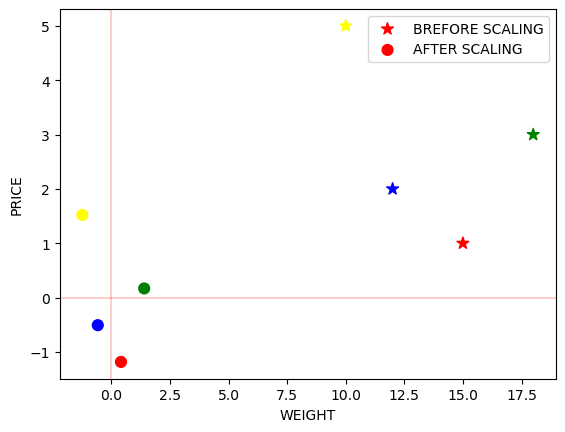

In [23]:
ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');

df2.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax)

plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

### The million-dollar question: Normalization or Standardization

- If you have ever built a machine learning pipeline, you must have always faced this question of whether to Normalize or to Standardize. While there is no obvious answer to this question, it really depends on the application, there are still a few generalizations that can be drawn.
- normalization and standardization will not change the distribution of your data. In other words, if your variable is not normally distributed, it won’t be turn into one with the normalize method.

- Normalization is good to use when the distribution of data does not follow a Gaussian distribution. It can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors.

- In Neural Networks algorithm that require data on a 0–1 scale, normalization is an essential pre-processing step. Another popular example of data normalization is image processing, where pixel intensities have to be normalized to fit within a certain range (i.e., 0 to 255 for the RGB color range).

- Standardization can be helpful in cases where the data follows a Gaussian distribution. Though this does not have to be necessarily true. Since standardization does not have a bounding range, so, even if there are outliers in the data, they will not be affected by standardization.

- In clustering analyses, standardization comes in handy to compare similarities between features based on certain distance measures. Another prominent example is the Principal Component Analysis, where we usually prefer standardization over Min-Max scaling since we are interested in the components that maximize the variance.

- There are some points which can be considered while deciding whether we need Standardization or Normalization

- Standardization may be used when data represent Gaussian Distribution, while Normalization is great with Non-Gaussian Distribution
- Impact of Outliers is very high in Normalization
- To conclude, you can always start by fitting your model to raw, normalized, and standardized data and compare the performance for the best results.

### The link between Data Scaling and Data Leakage
- In order to apply Normalization or Standardization, we can use the prebuilt functions in scikit-learn or can create our own custom function.

- Data leakage mainly occurs when some information from the training data is revealed to the validation data. In order to prevent the same, the point to pay attention to is to fit the scaler on the train data and then use it to transform the test data. For further details on data leakage, you can check out my article on data leakage and how to mitigate it.

### 3. Max Abs Scaler

- divides each feature by its maximum value, that the training data lies within the range [-1, 1]
- Scale each feature by its maximum absolute value. This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set is 1.0. It does not shift/center the data and thus does not destroy any sparsity.
- It says that it scales in a way that the training data lies within the range [-1, 1] by dividing through the largest maximum value in each feature.
- I think it works per column when it says in each feature.
- On positive-only data, this Scaler behaves similarly to Min Max Scaler and, therefore, also suffers from the presence of significant outliers.

In [36]:
df_3 = pd.DataFrame({'WEIGHT': [15, 18, 12,10],
                   'PRICE': [1,3,2,5]},
                   index = ['Orange','Apple','Banana','Grape'])
print(df_3)

        WEIGHT  PRICE
Orange      15      1
Apple       18      3
Banana      12      2
Grape       10      5


In [37]:
from sklearn.preprocessing import MaxAbsScaler

In [38]:
scaler = MaxAbsScaler()

In [40]:
result = pd.DataFrame(scaler.fit_transform(df_3),
                      columns=df_3.columns,
                     index = ['Orange','Apple','Banana','Grape'])
result

,WEIGHT,PRICE
Orange,0.833333,0.2
Apple,1.000000,0.6
Banana,0.666667,0.4
Grape,0.555556,1.0


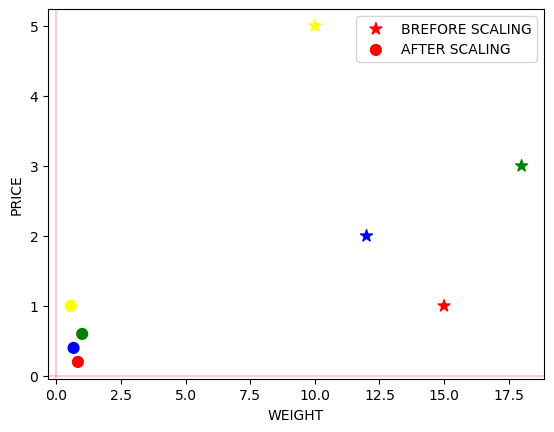

In [42]:
ax = df_3.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');

result.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax)

plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

### 4. Robust Scaler

- As the name suggests, this Scaler is robust to outliers. If our data contains many outliers, scaling using the mean and standard deviation of the data won’t work well.

- This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). 
- The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile). 
- The centering and scaling statistics of this Scaler are based on percentiles and are therefore not influenced by a few numbers of huge marginal outliers. 
- Note that the outliers themselves are still present in the transformed data. If a separate outlier clipping is desirable, a non-linear transformation is required.

In [54]:
df_4 = pd.DataFrame({'WEIGHT': [15, 18, 12,10],
                   'PRICE': [1,3,2,5]},
                   index = ['Orange','Apple','Banana','Grape'])
print(df_4)

        WEIGHT  PRICE
Orange      15      1
Apple       18      3
Banana      12      2
Grape       10      5


In [55]:
from sklearn.preprocessing import RobustScaler

In [56]:
scaler = RobustScaler()

In [57]:
result = pd.DataFrame(scaler.fit_transform(df_4),
                   columns = df_4.columns,
                   index = ['Orange','Apple','Banana','Grape'])
result

,WEIGHT,PRICE
Orange,0.352941,-0.857143
Apple,1.058824,0.285714
Banana,-0.352941,-0.285714
Grape,-0.823529,1.428571


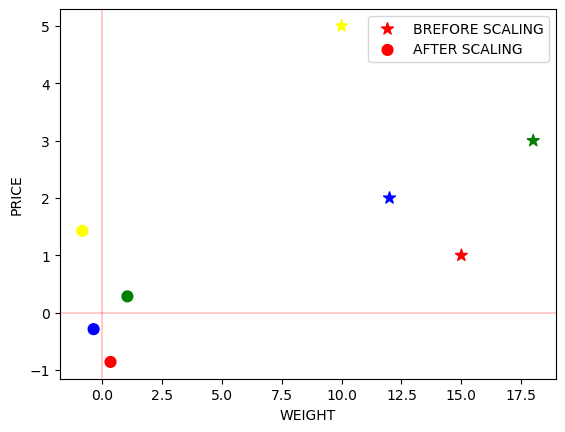

In [58]:
ax = df_4.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');

result.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax)

plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)

- Let’s now see what happens if we introduce an outlier and see the effect of scaling using Standard Scaler and Robust Scaler (a circle shows outlier).

In [63]:
dfr = pd.DataFrame({'WEIGHT': [15, 18, 12,10,50],
                   'PRICE': [1,3,2,5,20]},
                   index = ['Orange','Apple','Banana','Grape','Jackfruit'])
print(dfr)

           WEIGHT  PRICE
Orange         15      1
Apple          18      3
Banana         12      2
Grape          10      5
Jackfruit      50     20


In [67]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standard_result = pd.DataFrame(standard_scaler.fit_transform(dfr),
                     columns= df.columns,
                     index = ['Orange','Apple','Banana','Grape','Jackfruit'])
standard_result

,WEIGHT,PRICE
Orange,-0.406745,-0.740143
Apple,-0.203372,-0.455473
Banana,-0.610117,-0.597808
Grape,-0.745698,-0.170802
Jackfruit,1.965932,1.964226


In [68]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
robust_result = pd.DataFrame(robust_scaler.fit_transform(dfr),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape','Jackfruit'])
robust_result

,WEIGHT,PRICE
Orange,0.000000,-0.666667
Apple,0.500000,0.000000
Banana,-0.500000,-0.333333
Grape,-0.833333,0.666667
Jackfruit,5.833333,5.666667


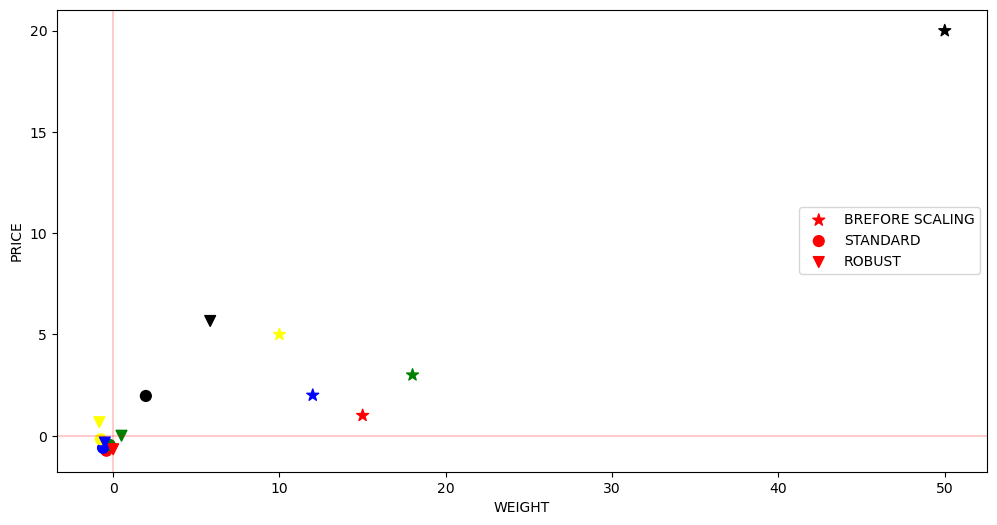

In [71]:
ax = dfr.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow','black'], 
                     marker = '*',s=80, label='BREFORE SCALING')
standard_result.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow','black'],
                 marker = 'o',s=60,label='STANDARD', ax = ax,figsize=(12,6))

robust_result.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow','black'],
                 marker = 'v',s=60,label='ROBUST', ax = ax,figsize=(12,6))
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)

### 5. Quantile Transformer Scaler

- Transform features using quantiles information.
        - Quantiles are values that split sorted data or a probability distribution into equal parts. 
        - In general terms, a q-quantile divides sorted data into q parts. The most commonly used quantiles have special names: Quartiles (4-quantiles): Three quartiles split the data into four parts.

- This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is, therefore, a robust pre-processing scheme.

- The cumulative distribution function of a feature is used to project the original values. 
- Note that this transform is non-linear and may distort linear correlations between variables measured at the same scale but renders variables measured at different scales more directly comparable. This is also sometimes called as ""Rank scaler"".

In [77]:
df_5 = pd.DataFrame({'WEIGHT': [15, 18, 12,10],
                   'PRICE': [1,3,2,5]},
                   index = ['Orange','Apple','Banana','Grape'])
print(df_5)

        WEIGHT  PRICE
Orange      15      1
Apple       18      3
Banana      12      2
Grape       10      5


In [78]:
from sklearn.preprocessing import QuantileTransformer

In [79]:
scaler = QuantileTransformer()

In [80]:
result = pd.DataFrame(scaler.fit_transform(df_5),
                     columns= df_5.columns,
                     index = ['Orange','Apple','Banana','Grape'] )
result

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (4). n_quantiles is set to n_samples.
  warnings.warn(


,WEIGHT,PRICE
Orange,0.666667,0.000000
Apple,1.000000,0.666667
Banana,0.333333,0.333333
Grape,0.000000,1.000000


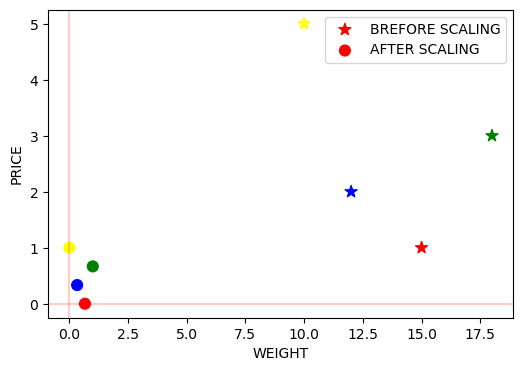

In [81]:
ax = df_5.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');
result.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax,figsize=(6,4))
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)

- The above example is just for illustration as Quantile transformer is useful when we have a large dataset with many data points usually more than 1000.

### 6. Power Transformer Scaler

- The power transformer is a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. 
- This is useful for modeling issues related to the variability of a variable that is unequal across the range (heteroscedasticity) or situations where normality is desired.

- The power transform finds the optimal scaling factor in stabilizing variance and minimizing skewness through maximum likelihood estimation. Currently, Sklearn implementation of PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform. 
- The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood. Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data.

In [82]:
df_6 = pd.DataFrame({'WEIGHT': [15, 18, 12,10],
                   'PRICE': [1,3,2,5]},
                   index = ['Orange','Apple','Banana','Grape'])
print(df_6)

        WEIGHT  PRICE
Orange      15      1
Apple       18      3
Banana      12      2
Grape       10      5


In [83]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
result = pd.DataFrame(scaler.fit_transform(df_6),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
result

,WEIGHT,PRICE
Orange,0.500180,-1.368084
Apple,1.324116,0.358244
Banana,-0.504405,-0.358249
Grape,-1.319891,1.368089


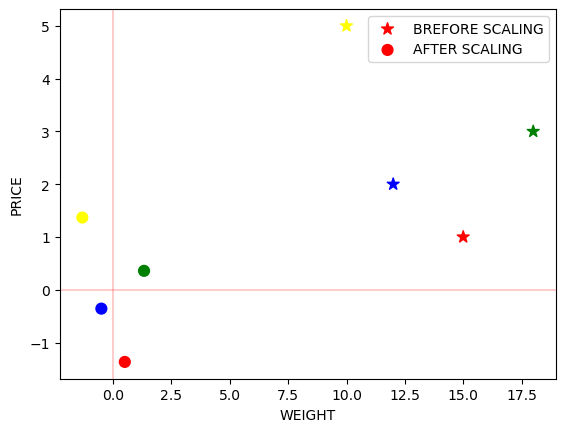

In [84]:
ax = df_6.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');
result.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)

### 7. Unit Vector Scaler / Scaling to unit length

- Scaling is done considering the whole feature vector to be of unit length. This usually means dividing each component by the Euclidean length of the vector (L2 Norm). In some applications (e.g., histogram features), it can be more practical to use the L1 norm of the feature vector.

- Like Min-Max Scaling, the Unit Vector technique produces values of range [0,1]. When dealing with features with hard boundaries, this is quite useful. For example, when dealing with image data, the colors can range from only 0 to 255.
- The aim of this method is to scale the components of a feature vector such that the complete vector has length one. This usually means dividing each component by the Euclidean length of the vector:

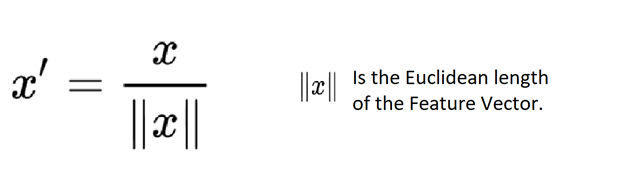

In [91]:
df_7 = pd.DataFrame({'WEIGHT': [15, 18, 12,10],
                   'PRICE': [1,3,2,5]},
                   index = ['Orange','Apple','Banana','Grape'])
print(df_7)

        WEIGHT  PRICE
Orange      15      1
Apple       18      3
Banana      12      2
Grape       10      5


In [92]:
# Unit Vector with L1 norm
df_result_1 = df_7.apply(lambda x : x / np.linalg.norm(x,1))
df_result_1

,WEIGHT,PRICE
Orange,0.272727,0.090909
Apple,0.327273,0.272727
Banana,0.218182,0.181818
Grape,0.181818,0.454545


In [93]:
# Unit Vector with L2 norm
df_result_2 = df_7.apply(lambda x : x / np.linalg.norm(x,2))
df_result_2

,WEIGHT,PRICE
Orange,0.532666,0.160128
Apple,0.639199,0.480384
Banana,0.426132,0.320256
Grape,0.355110,0.800641


- If we plot, then it would look as below for L1 and L2 norm, respectively.

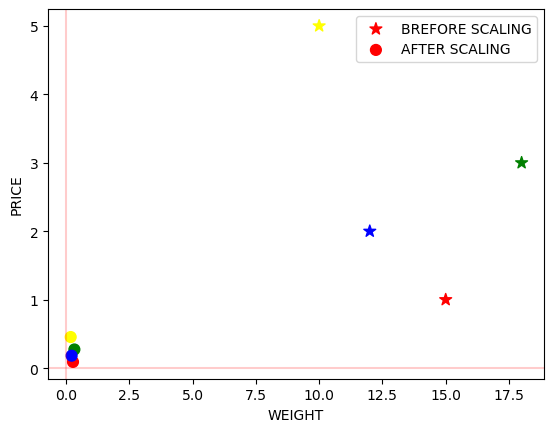

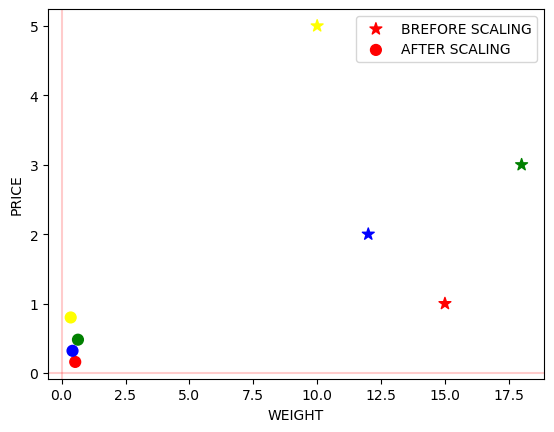

In [94]:
ax = df_7.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');
df_result_1.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)


ax = df_7.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');
df_result_2.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)

- The below diagram shows how data spread for all different scaling techniques, and as we can see, a few points are overlapping, thus not visible separately.

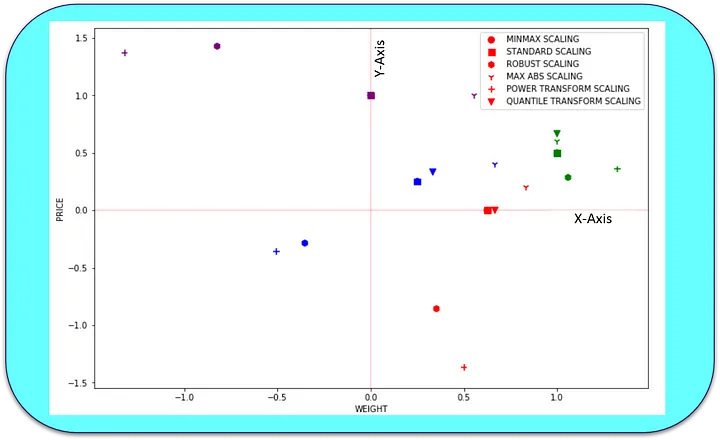

# When to scale your data?
- After building an understanding of how to do data scaling and which data scaling techniques to use, we can now talk about where to use these data scaling techniques.

### Gradient Descent Based Algorithms
- If an algorithm uses gradient descent, then the difference in ranges of features will cause different step sizes for each feature. To ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features, we scale the data before feeding it to the model. Having features on a similar scale will help the gradient descent converge more quickly towards the minima.

- Specifically, in the case of Neural Networks Algorithms, feature scaling benefits optimization by:

-- It makes the training faster

-- It prevents the optimization from getting stuck in local optima

-- It gives a better error surface shape

-- Weight decay and Bayes optimization can be done more conveniently

### Distance-Based Algorithms
- KNN
- K-Means clustering
- SVM
- Distance-based algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity and hence perform the task at hand. Therefore, we scale our data before employing a distance-based algorithm so that all the features contribute equally to the result.

### For feature engineering using PCA
- In PCA we are interested in the components that maximize the variance. If one component (e.g. age) varies less than another (e.g. salary) because of their respective scales, PCA might determine that the direction of maximal variance more closely corresponds with the ‘salary’ axis, if those features are not scaled. As a change in the age of one year can be considered much more important than the change in salary of one euro, this is clearly incorrect.

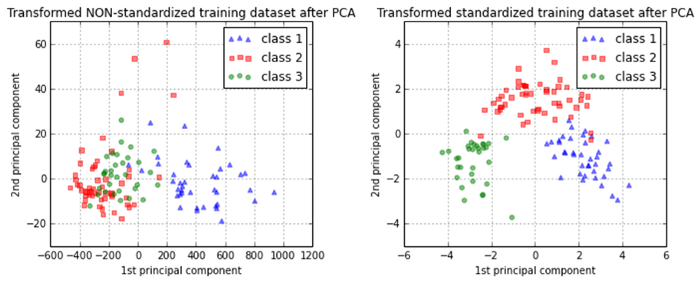

# What about regression?
- In regression, it is often recommended to scale the features so that the predictors have a mean of 0. This makes it easier to interpret the intercept term as the expected value of Y when the predictor values are set to their means. There are few other aspects that vouch for feature centering in case of regression:

-- When one variable has a very large scale: e.g. if you are using the population size of a country as a predictor. In that case, the regression coefficients may be on a very small order of magnitude (e.g. e^-9) which can be a little annoying when you’re reading computer output, so you may convert the variable to, for example, population size in millions or just perform a Normalization.

-- While creating power terms: Let’s say you have a variable, X, that ranges from 1 to 2, but you suspect a curvilinear relationship with the response variable, and so you want to create an X² term. If you don’t center X first, your squared term will be highly correlated with X, which could muddy the estimation of the beta. Centering first addresses this issue.

-- Creating interaction terms: If an interaction/product term is created from two variables that are not centered on 0, some amount of collinearity will be induced (with the exact amount depending on various factors).

- Centering/scaling does not affect your statistical inference in regression models — the estimates are adjusted appropriately and the p-values will be the same. The scale and location of the explanatory variables do not affect the validity of the regression model in any way.

- The betas are estimated such that they convert the units of each explanatory variable into the units of the response variable appropriately.

- Consider the model:

- y=β0+β1×1+β2×2+…+ϵy=β0+β1×1+β2×2+…+ϵ.

- The least-squares estimators of β1,β2,…β1,β2,… are not affected by shifting. The reason is that these are the slopes of the fitting surface — how much the surface changes if you change x1,x2,…x1,x2,… one unit. This does not depend on location. The scaling doesn’t affect the estimators of the other slopes. Thus, scaling simply corresponds to scaling the corresponding slopes.

- To conclude, technically, feature scaling does not make a difference in the regression, but it might give us some practical benefits and in further feature engineering steps.

# When scaling your data is NOT necessary?
- Tree-based algorithms

    -- Decision Tree
    
    -- Random Forest
    
    -- Adaboost
    
- Tree-based algorithms are fairly insensitive to the scale of the features. A decision tree is only splitting a node based on a single feature. The decision tree splits a node on a feature that increases the homogeneity of the node. This split on a feature is not influenced by other features. Hence, there is virtually no effect of the remaining features on the split. This is what makes them invariant to the scale of the features.

# Should you ALWAYS do feature engineering?
- If there are some algorithms that are not really affected by feature scaling and can work with or without feature scaling, but then there are some algorithms that just cannot work without the features being scaled, does it not make sense to ALWAYS perform feature engineering?

- Well, not ALWAYS — imagine classifying something that has equal units of measurement recorded with noise. Like a photograph or microarray or some spectrum. In this case, you already know a-priori that your features have equal units. If you were to scale them all you would amplify the effect of features that are constant across all samples, but were measured with noise. (Like the background of the photo). This again will have an influence on KNN and might drastically reduce performance if your data had more noisy constant values compared to the ones that vary.

- Some questions that you should ask yourself to decide whether scaling is a good idea:

-- What would normalization do to your data wrt solving the task at hand? Should that become easier or do you risk deleting important information?

-- Is the algorithm sensitive to the scale of the data?

-- Does the algorithm or its actual implementation perform its own normalization?
 
- Now you know-all about feature scaling, the next step is to apply it correctly in your ML pipelines.

- Thank you for your time and attention. Please check out our GitHub gallery for some interesting use cases and to see a python library with an in-built BI tool in action!

- Github: - https://github.com/atoti/notebooks

https://www.atoti.io/articles/when-to-perform-a-feature-scaling/